In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [14]:
# load dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
X = df.drop("Outcome",axis = 1)
y = df["Outcome"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# losgistic regression
model = LogisticRegression()
model.fit(X_train,y_train)
#predict
y_pred = model.predict(X_test)

print("accuracy score : ",accuracy_score(y_test,y_pred))
print("confusion matrix:",confusion_matrix(y_test,y_pred))
print("classification report: ",classification_report(y_test,y_pred))



accuracy score :  0.7532467532467533
confusion matrix: [[79 20]
 [18 37]]
classification report:                precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



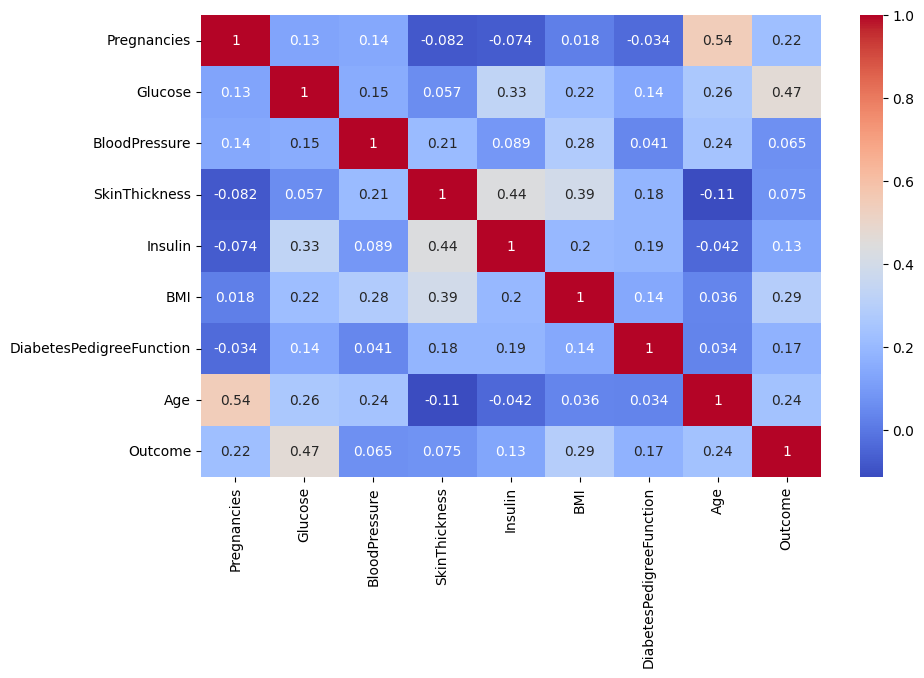

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True,cmap = "coolwarm")
plt.show()